In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
# Load the data
DATA_PATH = "data/"

data = pd.read_csv(DATA_PATH + "oscar_movies.csv")
data.head()


,tconst,primaryTitle,IMDB_genres,averageRating,numVotes,release,revenue,runtime,countries,CMU_genres,oscar_category,oscar_year,winner
0,tt0036775,double indemnity,"Crime,Drama,Film-Noir",8.3,170475,1944.0,5000000.0,108.0,"{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/0lsxr"": ""Crime F...",best motion picture,1945,False
1,tt0036855,gaslight,"Crime,Drama,Mystery",7.8,34945,1944.0,4613000.0,114.0,"{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/04xvh5"": ""Costum...",best motion picture,1945,False
2,tt0036868,the best years of our lives,"Drama,Romance,War",8.1,72109,1946.0,23650000.0,168.0,"{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3n0w"": ""Ensemble Film"", ""/m/02h8pkk"": ...",best motion picture,1947,True
3,tt0036872,going my way,"Comedy,Drama,Music",7.0,13723,1944.0,NaN,126.0,"{""/m/09c7w0"": ""United States of America""}","{""/m/04p5fxn"": ""Christian film"", ""/m/04t36"": ""...",best motion picture,1945,True
4,tt0037280,since you went away,"Drama,Romance,War",7.5,5182,1944.0,NaN,172.0,"{""/m/09c7w0"": ""United States of America""}","{""/m/02h8pkk"": ""Family Drama"", ""/m/0520lz"": ""R...",best motion picture,1945,False


### Winners Vs Nominees

We start by comparing the ratings of oscar winners and nominees to see if getting an oscar has a positive impact on the rating.

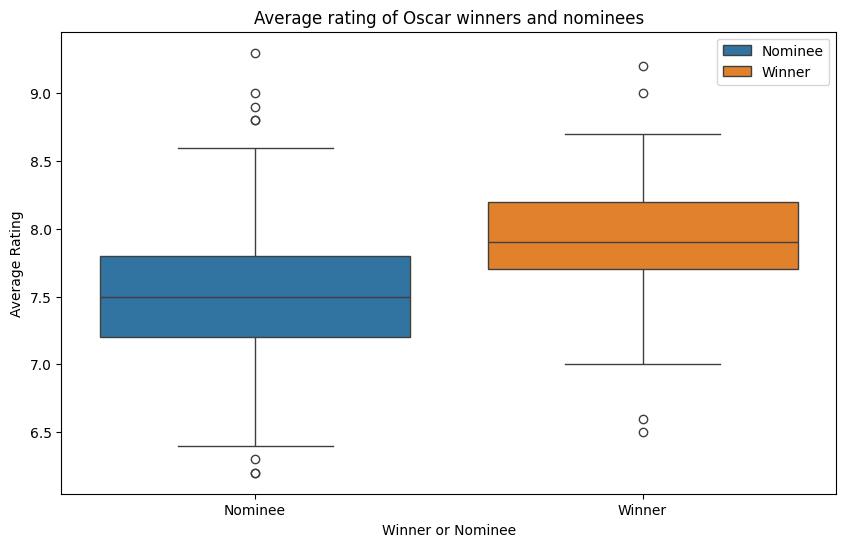

In [84]:
oscar_winners = data[data["winner"] == True]
oscar_nominees = data[data["winner"] == False]

# Plot the average rating box plot for winners and nominees
plt.figure(figsize=(10, 6))
sns.boxplot(x="winner", y="averageRating", data=data, hue="winner")    
plt.title("Average rating of Oscar winners and nominees")
plt.xlabel("Winner or Nominee")
plt.ylabel("Average Rating")
plt.legend(["Nominee", "Winner"])
plt.xticks([0, 1], ["Nominee", "Winner"])
plt.show()

In [85]:
# Perform a t-test to determine if the average ratings of winners and nominees are significantly different
from scipy.stats import ttest_ind
t_stat, p_val = ttest_ind(oscar_winners["averageRating"], oscar_nominees["averageRating"])
print("T-statistic: ", t_stat)
print("P-value: ", p_val)

T-statistic:  4.292684871161048
P-value:  2.42991213460508e-05


In [86]:

other_movies = pd.read_csv(DATA_PATH + "all_other_movies.csv")
# Remove movies with missing revenue data
other_movies = other_movies.dropna(subset=["revenue"])
# Drop 0 revenue movies
other_movies = other_movies[other_movies["revenue"] > 0]

# Get the top box office hit of each year
number_top_movies_per_year = 1

top_movies = other_movies.sort_values("revenue", ascending=False).groupby("release").head(number_top_movies_per_year)
top_movies = top_movies.reset_index(drop=True)

# Keep only where we have data for oscars
top_movies = top_movies[top_movies["release"].isin(data["release"])]

len(top_movies)

69

69

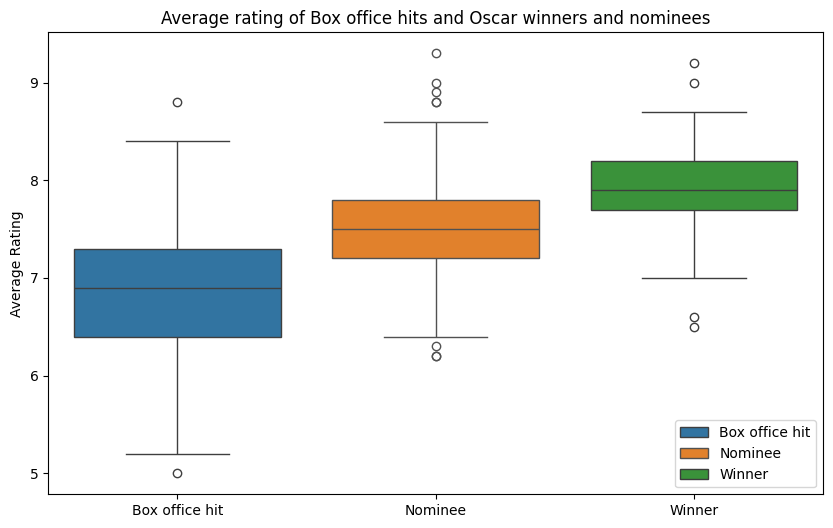

In [87]:
# Add to the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=0, y="averageRating", data=top_movies)
sns.boxplot(x=1, y="averageRating", data=oscar_nominees)
sns.boxplot(x=2, y="averageRating", data=oscar_winners)
plt.title("Average rating of Box office hits and Oscar winners and nominees")
plt.xlabel("")
plt.ylabel("Average Rating")
plt.legend(["Box office hit", "Nominee", "Winner"])
plt.xticks([0, 1, 2], ["Box office hit", "Nominee", "Winner"])


len(top_movies)

In [88]:
# Perform a t-test to determine if the average ratings of top movies and Oscar winners are significantly different
t_stat, p_val = ttest_ind(top_movies["averageRating"], oscar_winners["averageRating"])
print("T-statistic: ", t_stat)
print("P-value: ", p_val)

T-statistic:  -8.634219179460304
P-value:  2.9731503635246126e-14


### Gap in the ratings

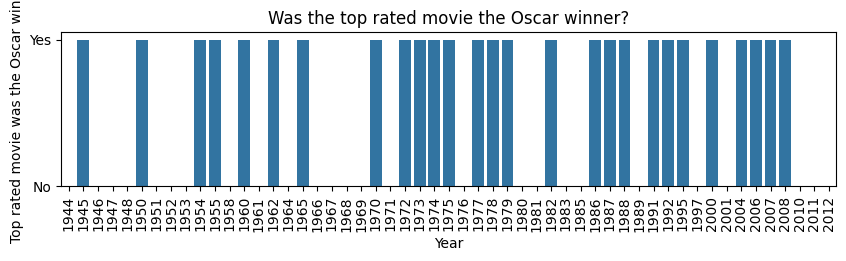

In [147]:
# Combine the data
combined_data = pd.concat([oscar_winners, oscar_nominees, top_movies])

# For each year, get the rating of the oscars winner, and the highest raiting movie
audience_winners = []
top_ratings = []

# Get the top rated movie(s) of each year
for year in combined_data["release"].unique():

    # Get the top rated movies of the year
    movies_of_year = combined_data[combined_data["release"] == year]
    top_rated_movies = movies_of_year.sort_values("averageRating", ascending=False)

    # Keep the top rated movies with equal top rating
    top_rated_movies = top_rated_movies[top_rated_movies["averageRating"] == top_rated_movies.iloc[0]["averageRating"]]

    audience_winners.append((int(year), top_rated_movies["primaryTitle"].values))
    top_ratings.append((int(year), top_rated_movies["averageRating"].values[0]))


# Check if the top rated movie of the year was the Oscar winner
audience_oscar_same = []
for year, movies in audience_winners:
    # Get the oscars winner of the year
    oscars_winner = combined_data[(combined_data["release"] == year) & (combined_data["winner"] == True)]
    oscars_winner = oscars_winner["primaryTitle"].values

    if len(oscars_winner) == 0:
        continue

    # Check if the oscars winner is in the top rated movies
    if oscars_winner[0] in movies:
        audience_oscar_same.append((int(year), True))
    else:
        audience_oscar_same.append((int(year), False))


# Create a new dataframe
audience_oscar_same_df = pd.DataFrame(audience_oscar_same, columns=["year", "same"])

# Plot the years where the top rated movie was the Oscar winner
plt.figure(figsize=(10, 2))
sns.barplot(x="year", y="same", data=audience_oscar_same_df)

plt.yticks([0, 1], ["No", "Yes"])
plt.ylabel("Top rated movie was the Oscar winner")

plt.xlabel("Year")
plt.xticks(rotation=90)
plt.title("Was the top rated movie the Oscar winner?")

plt.show()




In [151]:
# How frequently does the top rated movie win the Oscar?
audience_oscar_same_df["same"].value_counts(normalize=True)

print(f"Oscar winner was in the top rated movies {audience_oscar_same_df['same'].value_counts(normalize=True)[1] * 100:.2f}% of the time.")

Oscar winner was in the top rated movies 49.06% of the time.


/tmp/ipykernel_5379/690787525.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Oscar winner was in the top rated movies {audience_oscar_same_df['same'].value_counts(normalize=True)[1] * 100:.2f}% of the time.")


Text(0.5, 1.0, 'Difference in ratings between the top rated movie and the Oscar winner (%)')

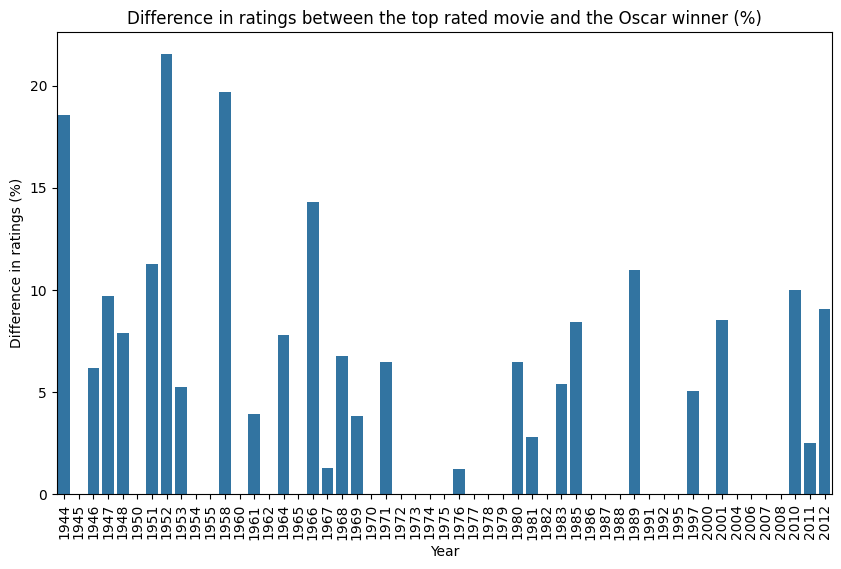

In [148]:
# Compare the oscar winners and the top rated movies
top_ratings_df = pd.DataFrame(top_ratings, columns=["year", "topRating"])
top_rating_vs_oscar_df = pd.merge(top_ratings_df, oscar_winners, left_on="year", right_on="release")

top_rating_vs_oscar_df["diff_percent"] = (top_rating_vs_oscar_df["topRating"] - top_rating_vs_oscar_df["averageRating"]) / top_rating_vs_oscar_df["averageRating"] * 100
# Plot the difference in ratings between the top rated movie and the Oscar winner
plt.figure(figsize=(10, 6))
sns.barplot(x="year", y="diff_percent", data=top_rating_vs_oscar_df)
plt.xticks(rotation=90)

plt.ylabel("Difference in ratings (%)")
plt.xlabel("Year")

plt.title("Difference in ratings between the top rated movie and the Oscar winner (%)")
